# Transfer Learning with TensorFlow: Scaling Up (Food Vision Mini)

In [1]:
from helper_functions import walk_through_dir
walk_through_dir("101_food_classes_10_percent")


There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

In [2]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [3]:
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, label_mode="categorical", image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, label_mode="categorical", image_size=IMG_SIZE, shuffle=False
)


Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Train a big dog model with transfer learning on 10% of 101 food classes

In [4]:
checkpoint_path = "checkpoints/101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", save_best_only=True, save_weights_only=True
)


In [5]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential(name="data_augmentation")
data_augmentation.add(preprocessing.RandomFlip("horizontal"))
data_augmentation.add(preprocessing.RandomRotation(0.2))
data_augmentation.add(preprocessing.RandomHeight(0.2))
data_augmentation.add(preprocessing.RandomWidth(0.2))
data_augmentation.add(preprocessing.RandomZoom(0.2))


In [6]:
# Setup the base model and freeze its layers
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAvgPool2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(
    len(train_data.class_names), activation="softmax", name="output_layer"
)(x)

model = tf.keras.Model(inputs, outputs)


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pool_layer (Globa (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [8]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history_all_classes_10_percent = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    steps_per_epoch=len(train_data),
    callbacks=[checkpoint_callback],
)


Epoch 1/5
237/237 [==============================] - 77s 289ms/step - loss: 3.4674 - accuracy: 0.2503 - val_loss: 2.7167 - val_accuracy: 0.3661
Epoch 2/5
237/237 [==============================] - 55s 232ms/step - loss: 2.3551 - accuracy: 0.4626 - val_loss: 2.2553 - val_accuracy: 0.4408
Epoch 3/5
237/237 [==============================] - 47s 198ms/step - loss: 1.9873 - accuracy: 0.5292 - val_loss: 2.0966 - val_accuracy: 0.4637
Epoch 4/5
237/237 [==============================] - 42s 179ms/step - loss: 1.7614 - accuracy: 0.5736 - val_loss: 2.0127 - val_accuracy: 0.4776
Epoch 5/5
237/237 [==============================] - 41s 171ms/step - loss: 1.6097 - accuracy: 0.6033 - val_loss: 1.9709 - val_accuracy: 0.4837


In [9]:
feature_extraction_results = model.evaluate(test_data)
feature_extraction_results

790/790 [==============================] - 47s 59ms/step - loss: 1.7161 - accuracy: 0.5501


[1.7161173820495605, 0.5501385927200317]

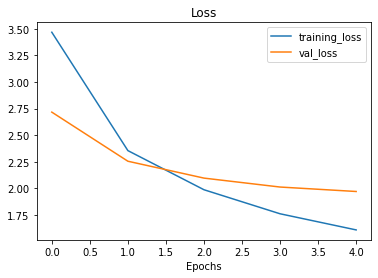

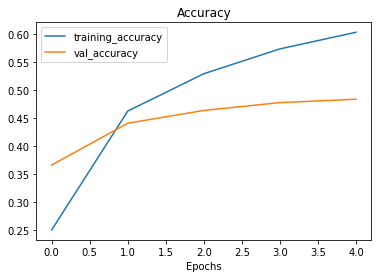

In [10]:
from helper_functions import plot_loss_curves

plot_loss_curves(history=history_all_classes_10_percent)

# Fine-Tunning

In [11]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
    layer.trainable = False

for index, layer in enumerate(base_model.layers):
    print(index, layer.name, layer.trainable)


0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [12]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"],
)


In [13]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tuning = model.fit(
    train_data,
    epochs=fine_tune_epochs,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    initial_epoch=history_all_classes_10_percent.epoch[-1],
    callbacks=[checkpoint_callback],
)


Epoch 5/10
237/237 [==============================] - 48s 176ms/step - loss: 1.3467 - accuracy: 0.6553 - val_loss: 1.9369 - val_accuracy: 0.4960
Epoch 6/10
237/237 [==============================] - 37s 156ms/step - loss: 1.2413 - accuracy: 0.6725 - val_loss: 1.8853 - val_accuracy: 0.5079
Epoch 7/10
237/237 [==============================] - 34s 143ms/step - loss: 1.1520 - accuracy: 0.6936 - val_loss: 1.9163 - val_accuracy: 0.5077
Epoch 8/10
237/237 [==============================] - 33s 137ms/step - loss: 1.0964 - accuracy: 0.7084 - val_loss: 1.8795 - val_accuracy: 0.5101
Epoch 9/10
237/237 [==============================] - 34s 145ms/step - loss: 1.0269 - accuracy: 0.7238 - val_loss: 1.8967 - val_accuracy: 0.5122
Epoch 10/10
237/237 [==============================] - 31s 129ms/step - loss: 0.9744 - accuracy: 0.7386 - val_loss: 1.9288 - val_accuracy: 0.5093


In [14]:
history_all_classes_10_percent_fine_tune_results = model.evaluate(test_data)
history_all_classes_10_percent_fine_tune_results

790/790 [==============================] - 47s 60ms/step - loss: 1.6298 - accuracy: 0.5713


[1.6298160552978516, 0.5712871551513672]

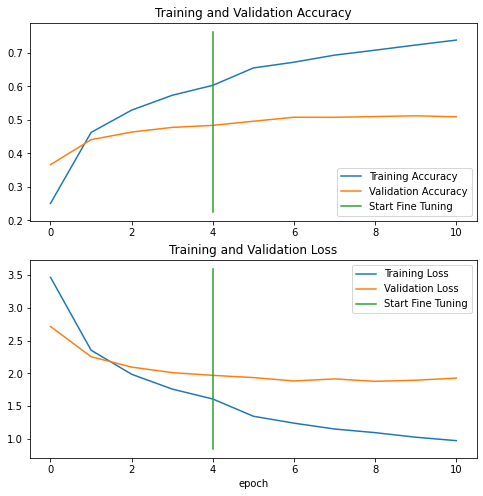

In [15]:
from helper_functions import compare_histories

compare_histories(history_all_classes_10_percent,history_all_classes_10_percent_fine_tuning)

In [16]:
# Save the fine tuned model
model.save("models/101classes/model_fine-tuned.h5")

C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [17]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("models/101classes/model_fine-tuned.h5")

In [18]:
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 49s 60ms/step - loss: 2.1317 - accuracy: 0.4612


[2.1317198276519775, 0.4612277150154114]

In [19]:
preds_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 39s 47ms/step


In [20]:
preds_probs.shape

(25250, 101)

In [21]:
preds_probs[:10]

array([[3.1417042e-01, 7.6192446e-05, 4.7130488e-02, ..., 1.4883062e-04,
        8.7208406e-04, 1.2337911e-01],
       [9.4423223e-01, 1.1438361e-07, 1.0034743e-03, ..., 4.1920249e-04,
        3.1638581e-07, 4.9138816e-06],
       [4.2924052e-01, 6.5039508e-03, 2.8039888e-03, ..., 9.0256438e-04,
        1.1060317e-03, 7.0303222e-03],
       ...,
       [5.3841364e-01, 2.4566973e-06, 1.4668651e-03, ..., 4.5790866e-02,
        8.2390627e-04, 1.4800507e-04],
       [2.3153464e-01, 1.0221495e-03, 8.4924817e-02, ..., 4.5143475e-04,
        1.7773063e-04, 7.1237521e-04],
       [6.5652931e-01, 1.2122971e-06, 3.1331653e-04, ..., 7.5684190e-03,
        5.9393042e-06, 4.1155312e-03]], dtype=float32)

In [27]:
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0,  0,  0, 29, 78, 29,  0,  9,  0], dtype=int64)

In [28]:
len(pred_classes)

25250

In [22]:
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n{preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {train_data.class_names[preds_probs[0].argmax()]}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
[3.14170420e-01 7.61924457e-05 4.71304879e-02 1.55486319e-07
 2.85645251e-06 2.89584000e-06 1.88842387e-04 9.29416001e-06
 1.49288801e-02 5.58491622e-04 3.46136108e-06 8.21076992e-06
 2.10203440e-03 8.00387568e-07 7.94318784e-03 3.73581832e-04
 7.26647613e-06 3.99994839e-04 1.66031066e-03 8.16638203e-06
 2.72198202e-04 1.78141709e-05 1.15661504e-04 3.49059730e-04
 9.68833978e-04 1.94633636e-03 2.52257712e-04 1.50217365e-05
 2.62176245e-01 2.26379861e-03 2.32410935e-06 4.85623546e-04
 8.53787875e-04 1.65390617e-07 8.30552541e-03 3.72802024e-05
 1.50244596e-04 3.16874910e-04 2.59173065e-02 2.57894753e-05
 7.24884390e-04 6.45738444e-04 2.23720493e-03 4.31319268e-06
 1.67414746e-05 2.04145472e-05 5.38123597e-04 4.44418984e-04
 2.07440075e-06 2.68909670e-02 4.45503654e-04 3.34120232e-05
 4.05628942e-02 9.74210165e-03 2.25378717e-05 1.51150730e-02
 9.87828057e-03 9.84914368e-04 2.24136934e-0

In [23]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())

y_labels[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [24]:
len(y_labels)

25250

In [25]:
loaded_model_results

[2.1317198276519775, 0.4612277150154114]

In [26]:
import numpy as np
from helper_functions import make_confusion_matrix


In [29]:
class_names = test_data.class_names

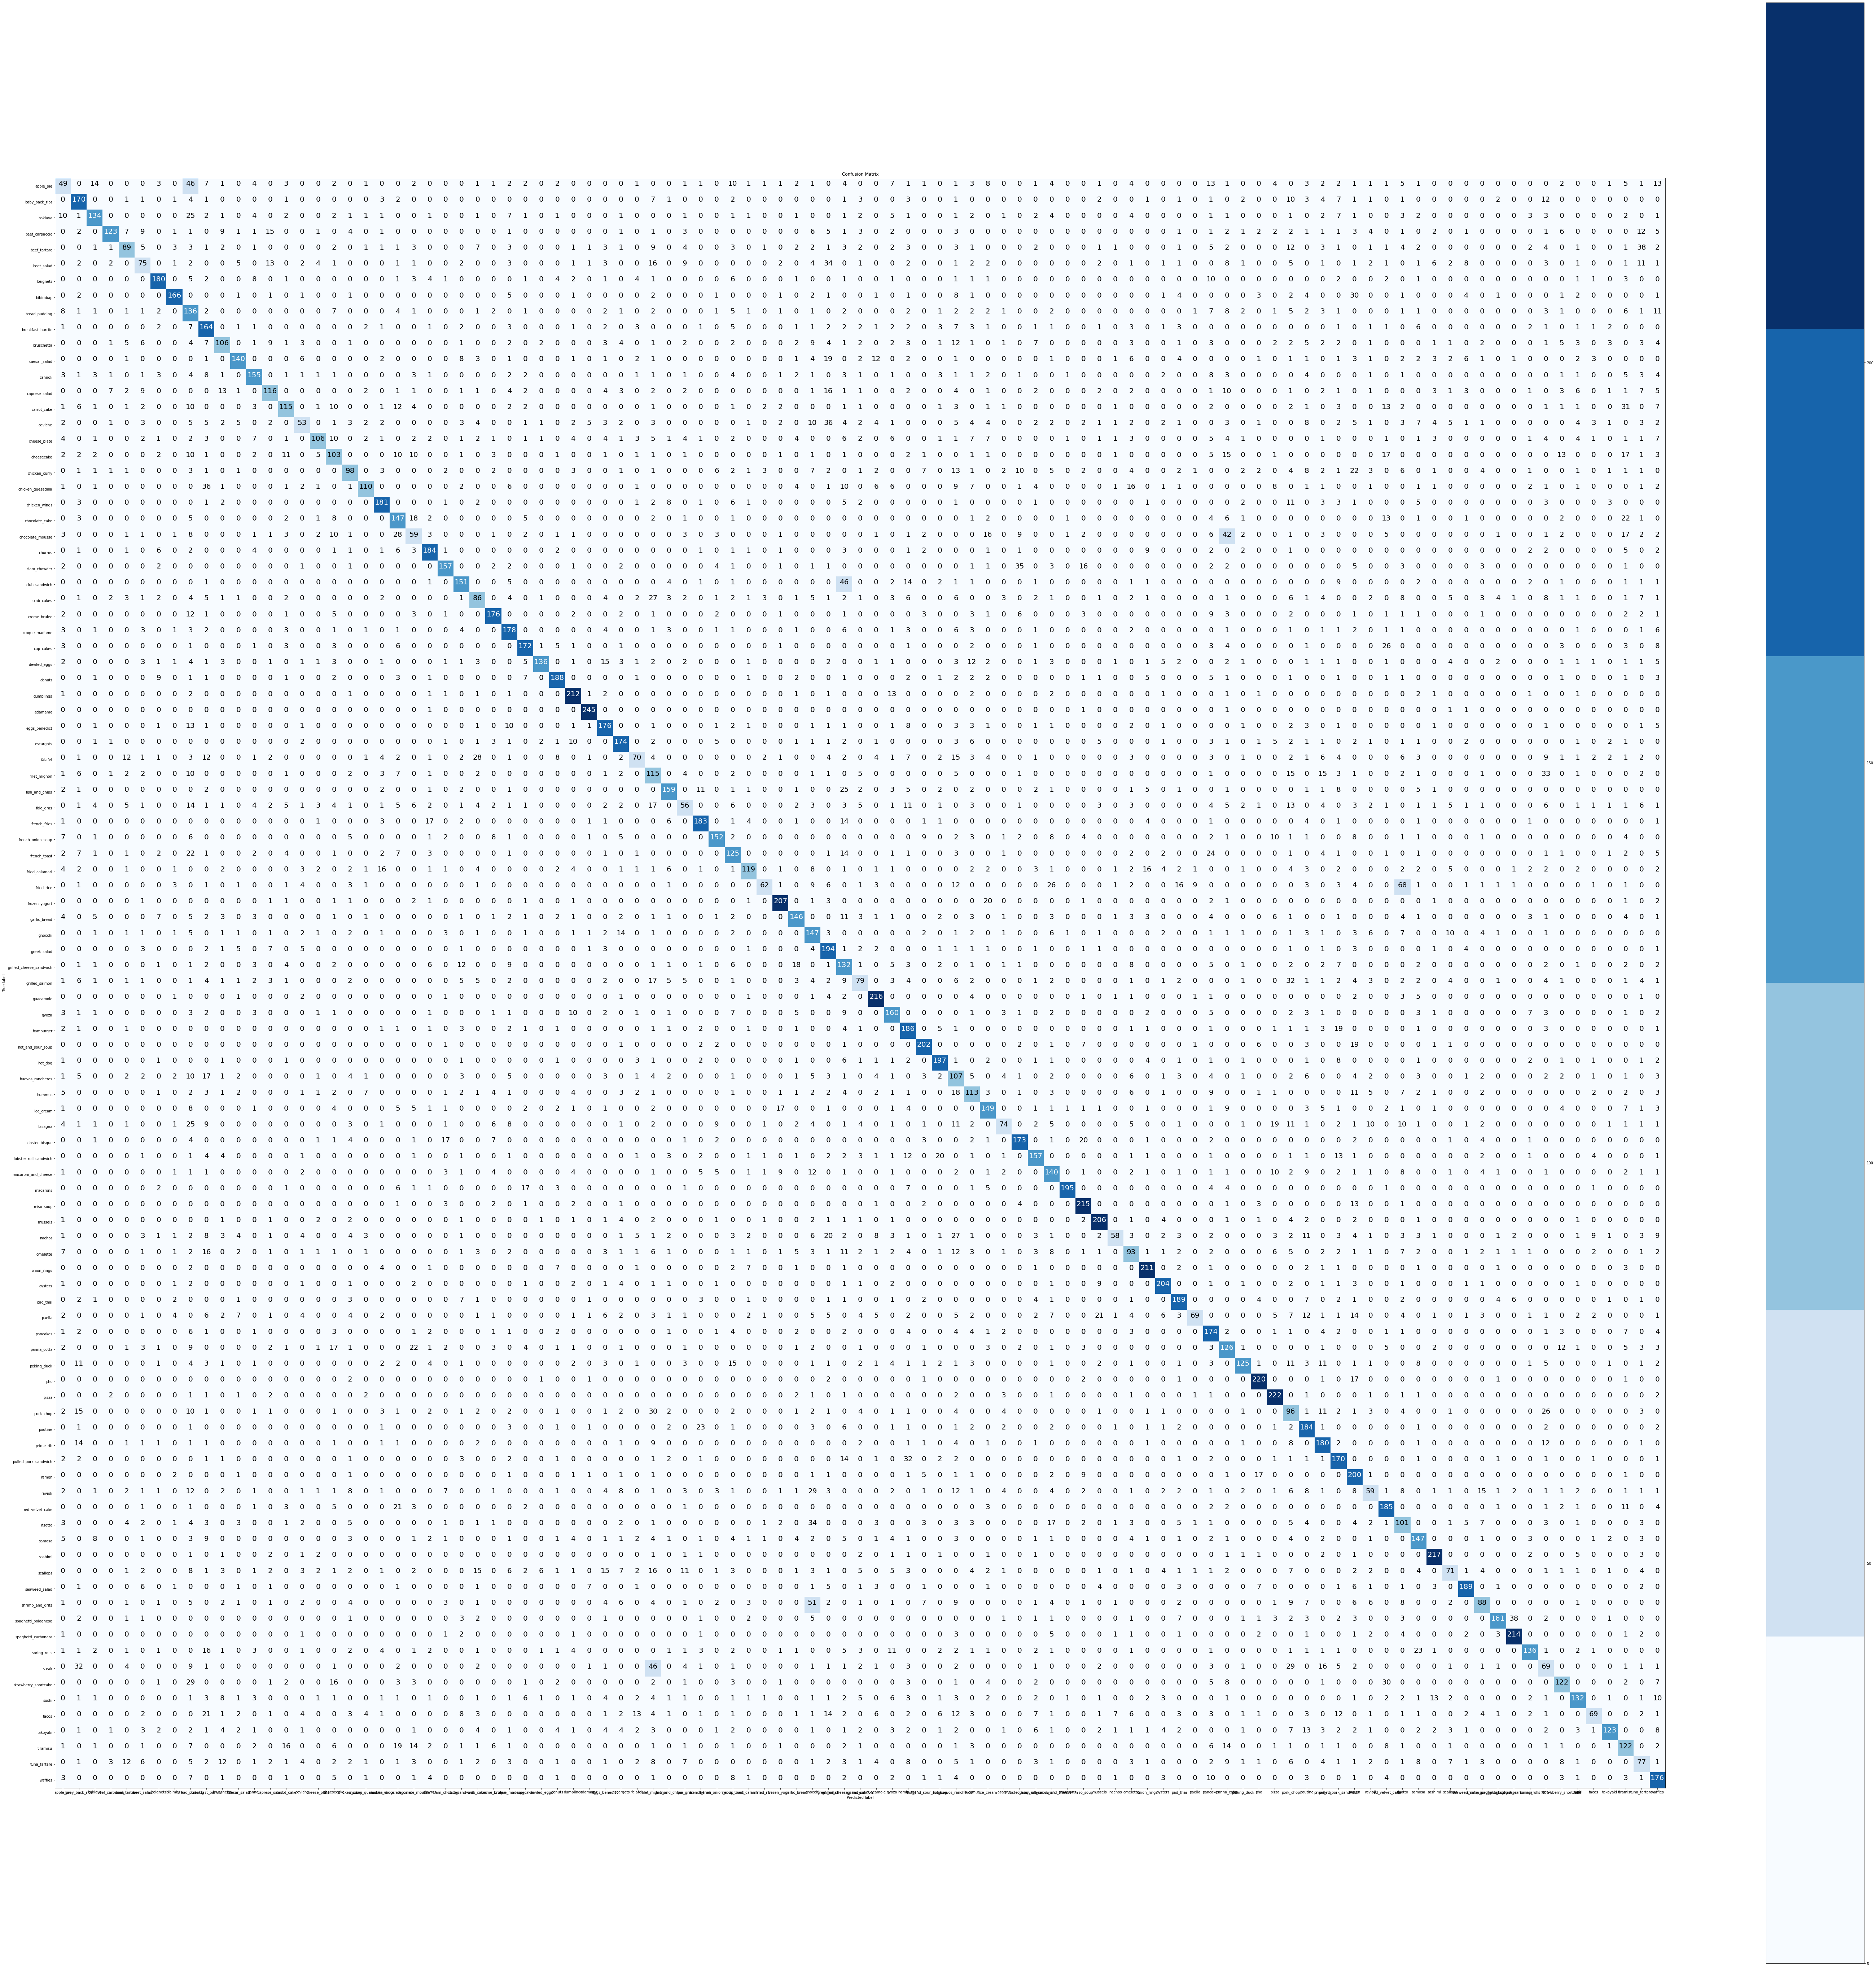

In [31]:
make_confusion_matrix(
    y_true=y_labels,
    y_pred=pred_classes,
    classes=class_names,
    figsize=(100, 100),
    text_size=20,
)


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_labels, y_pred=pred_classes))


              precision    recall  f1-score   support

           0       0.28      0.20      0.23       250
           1       0.54      0.68      0.60       250
           2       0.69      0.54      0.60       250
           3       0.84      0.49      0.62       250
           4       0.53      0.36      0.43       250
           5       0.44      0.30      0.36       250
           6       0.75      0.72      0.74       250
           7       0.84      0.66      0.74       250
           8       0.24      0.54      0.33       250
           9       0.40      0.66      0.50       250
          10       0.53      0.42      0.47       250
          11       0.72      0.56      0.63       250
          12       0.68      0.62      0.65       250
          13       0.60      0.46      0.52       250
          14       0.59      0.46      0.52       250
          15       0.43      0.21      0.28       250
          16       0.74      0.42      0.54       250
          17       0.41    

In [33]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.2832369942196532,
  'recall': 0.196,
  'f1-score': 0.23167848699763594,
  'support': 250},
 '1': {'precision': 0.5379746835443038,
  'recall': 0.68,
  'f1-score': 0.6007067137809188,
  'support': 250},
 '2': {'precision': 0.6907216494845361,
  'recall': 0.536,
  'f1-score': 0.6036036036036035,
  'support': 250},
 '3': {'precision': 0.8367346938775511,
  'recall': 0.492,
  'f1-score': 0.6196473551637279,
  'support': 250},
 '4': {'precision': 0.5297619047619048,
  'recall': 0.356,
  'f1-score': 0.4258373205741627,
  'support': 250},
 '5': {'precision': 0.4411764705882353,
  'recall': 0.3,
  'f1-score': 0.35714285714285715,
  'support': 250},
 '6': {'precision': 0.7531380753138075,
  'recall': 0.72,
  'f1-score': 0.7361963190184049,
  'support': 250},
 '7': {'precision': 0.8383838383838383,
  'recall': 0.664,
  'f1-score': 0.7410714285714286,
  'support': 250},
 '8': {'precision': 0.23570190641247835,
  'recall': 0.544,
  'f1-score': 0.32889963724304716,
  'support'

In [34]:
# Create an empty dictionary
class_f1_scores = {}
for k, v in classification_report_dict.items():
    if k == "accuracy":
        break
    else:
        class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'apple_pie': 0.23167848699763594,
 'baby_back_ribs': 0.6007067137809188,
 'baklava': 0.6036036036036035,
 'beef_carpaccio': 0.6196473551637279,
 'beef_tartare': 0.4258373205741627,
 'beet_salad': 0.35714285714285715,
 'beignets': 0.7361963190184049,
 'bibimbap': 0.7410714285714286,
 'bread_pudding': 0.32889963724304716,
 'breakfast_burrito': 0.49546827794561943,
 'bruschetta': 0.4700665188470067,
 'caesar_salad': 0.6292134831460674,
 'cannoli': 0.6485355648535565,
 'caprese_salad': 0.5237020316027088,
 'carrot_cake': 0.515695067264574,
 'ceviche': 0.2834224598930481,
 'cheese_plate': 0.5380710659898478,
 'cheesecake': 0.412,
 'chicken_curry': 0.4444444444444444,
 'chicken_quesadilla': 0.5555555555555556,
 'chicken_wings': 0.7154150197628457,
 'chocolate_cake': 0.5259391771019679,
 'chocolate_mousse': 0.27251732101616627,
 'churros': 0.7201565557729941,
 'clam_chowder': 0.6752688172043011,
 'club_sandwich': 0.61010101010101,
 'crab_cakes': 0.379690949227373,
 'creme_brulee': 0.71983640

In [35]:
import pandas as pd

f1_scores = pd.DataFrame(
    {
        "class_names": list(class_f1_scores.keys()),
        "f1-score": list(class_f1_scores.values())
    }
).sort_values("f1-score", ascending=False)



In [39]:
f1_scores[:10]

,class_names,f1-score
33,edamame,0.938697
63,macarons,0.862832
75,pho,0.833333
91,spaghetti_carbonara,0.827853
86,sashimi,0.826667
45,frozen_yogurt,0.811765
68,onion_rings,0.799242
69,oysters,0.796875
54,hot_and_sour_soup,0.787524
51,guacamole,0.786885


In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-score for 101 Different Food Classes")
ax.invert_yaxis()